#  Compound interest

This demo simulates compound interest. (ref: 4.5: Block diagrams)
<img src = 'diagram.png'> <br>
$u[k]$: The deposits and withdrawals from the bank account <br>
$x[k]$: The current balance of the bank account(before deposit and interest) <br>
$y[k]$: The acquired interest of the year k <br>
$x[k+1]$: The 'next year' balance of the bank account  = current balance + interest + deposits - withdrawals <br>
c: Interest rate

In [ ]:
from Compound_interest import *
r = input_handler_r()

Enter the interest rate(as floating point number): 0.1


Enter this year u[k=0] input : A
Make sure the input is a number
Enter this year u[k=0] input : Z
Make sure the input is a number
Enter this year u[k=0] input : AZERTYUI
Make sure the input is a number
Enter this year u[k=0] input : 50
50.0 50.0 0.0 0.0


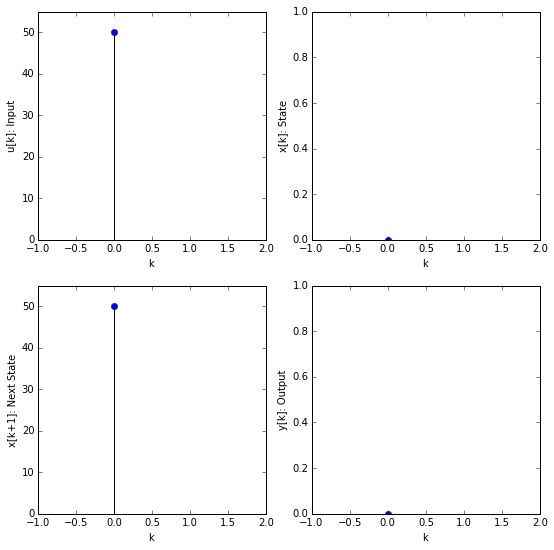

Do you want to keep going(Y/N)? Y
Enter this year u[k=1] input : 0
0.0 55.0 50.0 5.0


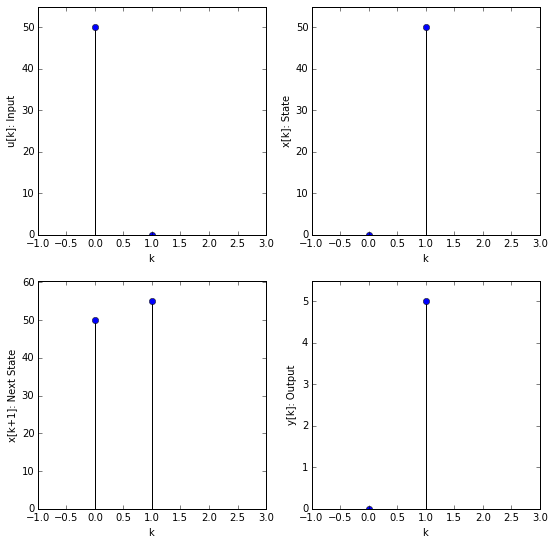

Do you want to keep going(Y/N)? Y


In [ ]:
%matplotlib inline
going = True
# Initializing intitial conditions.
y_k = [0.0]
x_k = [0.0]
u_k = []
x_k_1 = []
#Keep going as long as the user want it.
while going:
    current_u_k = input_handler_u(x_k,y_k)
    u_k.append(current_u_k)
    # Calculate next year value
    x_k_1.append(u_k[-1] + x_k[-1] + y_k[-1])
    print u_k[-1],x_k_1[-1],x_k[-1],y_k[-1]
    # draw result
    generate_result(u_k,x_k,x_k_1,y_k)
    # The next value of x[k] will be the current value of x[k+1]
    x_k.append(x_k_1[-1])
    # The next value of y[k] will be r times the next value of x[k]
    y_k.append(r*x_k[-1])
    going = input_handler_keep_going()
    